# ATP 2020/21

# TPC 7 - Processamento de uma dataset

* **Autor**: João Tiago Aleixo Ferreira
* **Supervisor**: José Carlos Ramalho, www.di.uminho.pt/~jcr/
* **Identificador**: TPC7
* **Título**: "Processamento de uma dataset"
* **Data início**: 2020-11-21
* **Data fim**: 2020-11-28

### Resumo: 
Este processamento de uma dataset com uma base de dados de vários alunos com os respetivos números curos e notas de trabalhos de casa permite-nos fazer várias coisas interessantes. Desde já, optamos por ordenar a lista de alunos (alfabeticamente) depois de ter limpo a base de dados. Depois optamos por criar várias funções como a de  consultar um determinado registo ver a disytibuição dos alunos por média e até por curso. Conseguimos também ver o top 10 de alunos no que toca às respetivas médias. Por fim criamos não só um gráfico de barras para facilitar a visualização da distribuição dos alunos por curso como também um gráfico de barras para ver a distribuição dos alunos pelas suas médias

In [3]:
# Descreve em texto o teu modelo
#
#BdAlunos = [aluno]
#Aluno = [id, nome, curso, [tpc1,tpc2,tpc3,tpc4]]
#
# Leitura/carregamento da informaçao do ficheiro

def convInt(s):
    return int(s)

def getAluno (texto):
    textoLimpo = texto.replace("\"", "")  #como limpar a string de forma a limpar lhe as aspas
    campos = textoLimpo.split(',')   #split transforma uma string numa lista de strings
    aluno = []
    aluno.append(campos[0])
    aluno.append(campos[1])
    aluno.append(campos[2])
    aluno.append(campos[3:])
    lista=[]
    for s in aluno[3]:
        s = lista.append(int(s))
    aluno[3] = lista
    return aluno
    

def lerDataset(fnome):
    f = open (fnome,encoding="utf-8")
    bd = []
    f.readline()
    for linha in f:
        bd.append(getAluno(linha))
    return bd

In [4]:
BD = []
BD = lerDataset("C:/Users/Tiaguini/Desktop/FACULDADE/2ºANO_1ºSEMESTRE/Alg_Tecn_Prog/TPC/TPC7/alunos.csv")
print (BD)

[['a1', 'Aysha Melanie Gilberto', 'LEI', [12, 8, 19, 8]], ['a2', 'Igor André Cantanhede', 'ENGFIS', [12, 16, 18, 20]], ['a3', 'Laurénio Narciso', 'ENGFIS', [8, 14, 15, 14]], ['a4', 'Jasnoor Casegas', 'LCC', [14, 20, 17, 11]], ['a5', 'Tawseef Rebouças', 'ENGBIOM', [13, 14, 13, 17]], ['a6', 'Eryk Clementino', 'LEI', [10, 19, 11, 14]], ['a7', 'Ianna Noivo', 'ENGBIOM', [15, 15, 17, 16]], ['a8', 'Ayla Thaissa Reina', 'ENGBIOM', [12, 8, 8, 18]], ['a9', 'Cássia Viviane Coitã', 'ENGFIS', [19, 9, 14, 10]], ['a10', 'Koby Vindima', 'LEI', [9, 14, 20, 13]], ['a11', 'Gustavo Martim Hernandez', 'ENGBIOM', [11, 8, 14, 11]], ['a12', 'Siddarta Beiriz', 'LEI', [17, 10, 16, 16]], ['a13', 'Daniela Patrícia Montes', 'ENGBIOM', [15, 15, 18, 19]], ['a14', 'Kaylla Pessego', 'LCC', [10, 14, 17, 15]], ['a15', 'Bianca Cristina Primitivo', 'ENGBIOM', [16, 9, 18, 10]], ['a16', 'Magna Galhardo', 'ENGFIS', [20, 18, 9, 14]], ['a17', 'Grace Isabel Patriarca', 'LCC', [19, 13, 9, 10]], ['a18', 'Saubhagya Buco', 'LEI', [

In [5]:
# Listagem da informaçao
def chaveOrd(a):
    return a[1]

def listarDataset(bd):
    bd.sort(key=chaveOrd)
    print ("id     nome     curso     média")
    print("--------------------------------")
    for a in bd:
        print (a[0] + "|" + a[1] + "|" + a[2] + "|" + str((sum(a[3]))/len(a[3])))

listarDataset(BD)

id     nome     curso     média
--------------------------------
a53|Abner Umbelina|ENGBIOM|14.75
a69|Adele Belchior|ENGBIOM|15.25
a88|Afonso Adriano Marca|ENGBIOM|12.75
a62|Ahmadou Bamba Calcinha|LCC|14.25
a72|Ana Gabriel Quirino|LCC|13.5
a96|Anaïs Sintra|LCC|14.75
a32|Ariane Sofia Foja|LEI|17.5
a8|Ayla Thaissa Reina|ENGBIOM|11.5
a1|Aysha Melanie Gilberto|LEI|11.75
a15|Bianca Cristina Primitivo|ENGBIOM|13.25
a93|Bivhan Reimbau|LCC|12.0
a61|Bradley Tabau|LCC|15.75
a73|Carolina Antoo|ENGBIOM|16.25
a86|Clésio Rodeiro|LCC|13.0
a91|Constança Filipa Melado|LEI|12.5
a9|Cássia Viviane Coitã|ENGFIS|13.0
a13|Daniela Patrícia Montes|ENGBIOM|16.75
a71|Derrick Urias|ENGFIS|10.75
a25|Dhriti Magano|ENGFIS|14.25
a36|Diana Beatriz Boavista|LCC|16.5
a83|Dolorinda Adolfo|ENGFIS|13.75
a75|Dárcio Wosvaldo Tudela|LEI|13.25
a54|Dânia Lucy Montelobo|LEI|15.75
a37|Elisiário Saberio|ENGFIS|16.25
a59|Emanuel Marcos Delfina|LEI|11.25
a6|Eryk Clementino|LEI|13.5
a58|Etienne Constentino|ENGBIOM|11.25
a31|Eva Man

In [6]:
# Consulta de um registo
def consultarDataset(bd, id):
    for a in bd:
        if a[0]== id:
            print(a[0] + '  |  ' +  a[1]+ '   |   ' + a[2]  + '   |   ' + str(a[3]) + '   |  ' + str((sum(a[3]))/len(a[3])))
              

consultarDataset(BD, 'a99')

a99  |  Xavier Luís Bulha   |   ENGFIS   |   [17, 13, 8, 10]   |  12.0


In [7]:
# os top10 melhroes alunos

def top10(bd):
    novaBD=[]
    for a in bd:
        novoAluno= a
        novoAluno[3]= (sum(a[3]))/len(a[3])
        novaBD.append(novoAluno)
    listaOrdenada= sorted(novaBD, key=lambda d: d[3], reverse=True)
    i=0
    while i<10:
        a=listaOrdenada[i]
        print(a[0] + '  |  ' +  a[1]+ '   |   ' + a[2]  + '   |  ' + str(a[3]))
        i+=1
        
        
top10(BD)

a80  |  Maria Carolina Josué   |   ENGFIS   |  18.0
a47  |  Moisés João Cornelio   |   LEI   |  18.0
a32  |  Ariane Sofia Foja   |   LEI   |  17.5
a74  |  Vânia Sofia Porfirio   |   ENGBIOM   |  17.5
a56  |  Hakeem Brazão   |   LEI   |  17.25
a84  |  Laudário Frasão   |   LCC   |  17.0
a13  |  Daniela Patrícia Montes   |   ENGBIOM   |  16.75
a45  |  Imayame Hespanha   |   ENGFIS   |  16.75
a41  |  Lachezar Rosas   |   ENGBIOM   |  16.75
a36  |  Diana Beatriz Boavista   |   LCC   |  16.5


In [8]:
def distribPorCurso(bd):   
    distribuicao={}
    for  a in bd:
        if a[2] in distribuicao.keys():
            distribuicao[a[2]]= distribuicao[a[2]] + 1
        else:
            distribuicao[a[2]]= 1
            
    return distribuicao

mydistrib= distribPorCurso(BD)
print(mydistrib)

{'ENGBIOM': 25, 'LCC': 20, 'LEI': 23, 'ENGFIS': 32}


In [15]:
def distribPorMedia(bd): 
    novaBD=[]
    for a in bd:
        novoAluno = a
        novaBD.append(novoAluno[3])
    novaBD.sort()
    distribuicao= {}
    for a in bd:
        if a[3] in distribuicao.keys():

            distribuicao[a[3]]+=1
        else:

            distribuicao[a[3]]=1
    return distribuicao
distribmedia = distribPorMedia(BD)
print(distribmedia)


{14.75: 5, 15.25: 8, 12.75: 7, 14.25: 6, 13.5: 2, 17.5: 2, 11.5: 3, 11.75: 2, 13.25: 5, 12.0: 4, 15.75: 4, 16.25: 2, 13.0: 6, 12.5: 2, 16.75: 3, 10.75: 1, 16.5: 4, 13.75: 7, 11.25: 3, 16.0: 2, 14.5: 5, 14.0: 5, 9.75: 2, 12.25: 2, 11.0: 1, 17.25: 1, 15.5: 1, 17.0: 1, 18.0: 2, 15.0: 2}


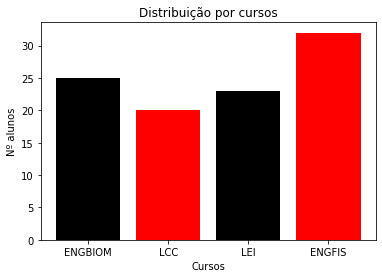

In [17]:
#grafico de barras com a distribuição dos alunos pelo curso em que estão

import matplotlib.pyplot as plt

def plotDistribPorCurso(bd):
    distribuicao=distribPorCurso(bd)
 
    x = list(range(1,len(distribuicao.keys())+1))
    y = list(distribuicao.values())

    cursos = list(distribuicao.keys())

    plt.bar(x, y, tick_label = cursos,
            width = 0.8, color = ['black','red'])

    plt.xlabel('Cursos')
    plt.ylabel('Nº alunos')
    plt.title('Distribuição por cursos')


    plt.show()

plotDistribPorCurso(BD)

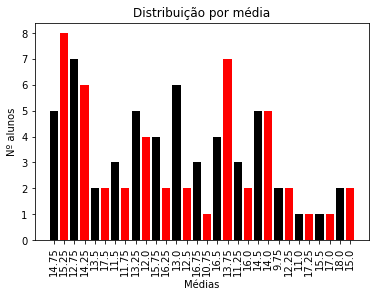

In [18]:
def plotDistribPorMedia(bd):
    
    distribuicao=distribPorMedia(bd)
 
    x = list(range(1,len(distribuicao.keys())+1))
    y = list(distribuicao.values())
    medias = list(distribuicao.keys())

    plt.bar(x, y, tick_label = medias,
            width = 0.8, color = ['black','red'])

    plt.xlabel('Médias')
    plt.ylabel('Nº alunos')
    plt.title('Distribuição por média')
    plt.xticks(rotation=90)


    plt.show()

plotDistribPorMedia(BD)